# Цель: ознакомление с основными алгоритмами машинного обучения при помощи библиотек sklearn и H2O.
Задачи: построить модель (на основании разных алгоритмов), предсказывающую качество вина, на основании заданных фичей. В идеале разными алгоритмами и разными метриками

Выводы: построена модель предсказывающая качество вина на основании признаков. На первом этапе данные были подготовлены, в процессе выполенения, применялись преобразования признаков

На первом этапе ( в склёрн) наибольшую аккуратность показала модель на основе случайных лесов.

Далее ( файл 2), при помощи библиотеки "вода", построены модели ( причём они все сразу строятся автоматически, что довольно круто, когда не знаешь что выбрать на начальном этапе), получены сразу же метрики и коэфициенты. В целом, "вода" очень крутая библиотека, мне было интересно и познавательно. 

In [1]:
# игнорим всякие предупреждения
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# взаимодействие с данными, визуализация
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)


# классификация
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
 

# регрессия
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#модельные методы
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#подготовка
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

#метрики
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [2]:
df=pd.read_csv('winequality-white.csv', sep = ';')

In [3]:
df.shape

(4898, 12)

In [4]:
df.columns # the quality is the target variable that we have to predict.

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
df.isnull().sum() # нет пропусков

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

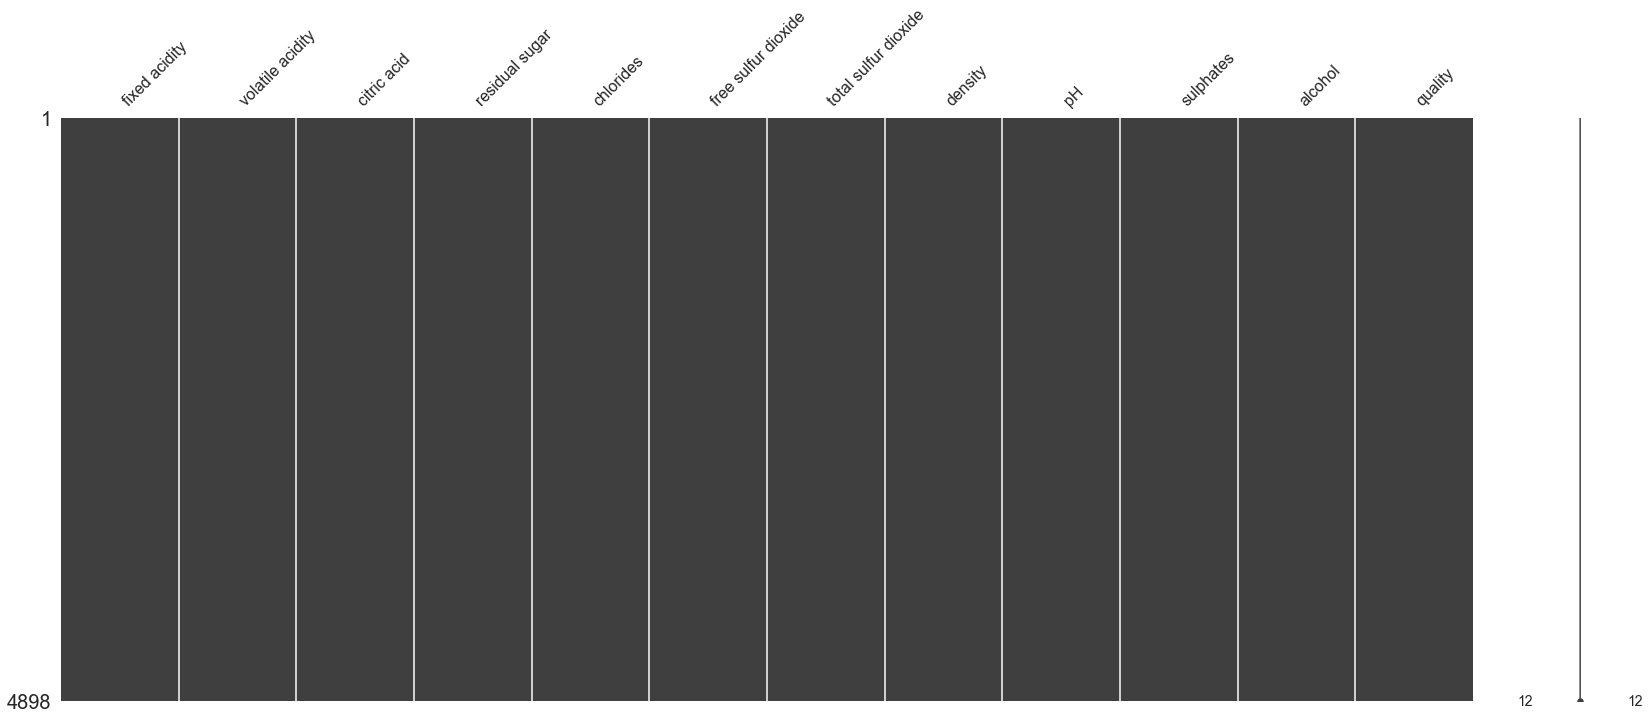

In [7]:
msno.matrix(df)  # ещё разок убедимся

#  NOW WE CAN VISUALIZE THE DISTRIBUTION OF VARIABLES ie THE UNIVARIATE ANALYSIS.

In [8]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


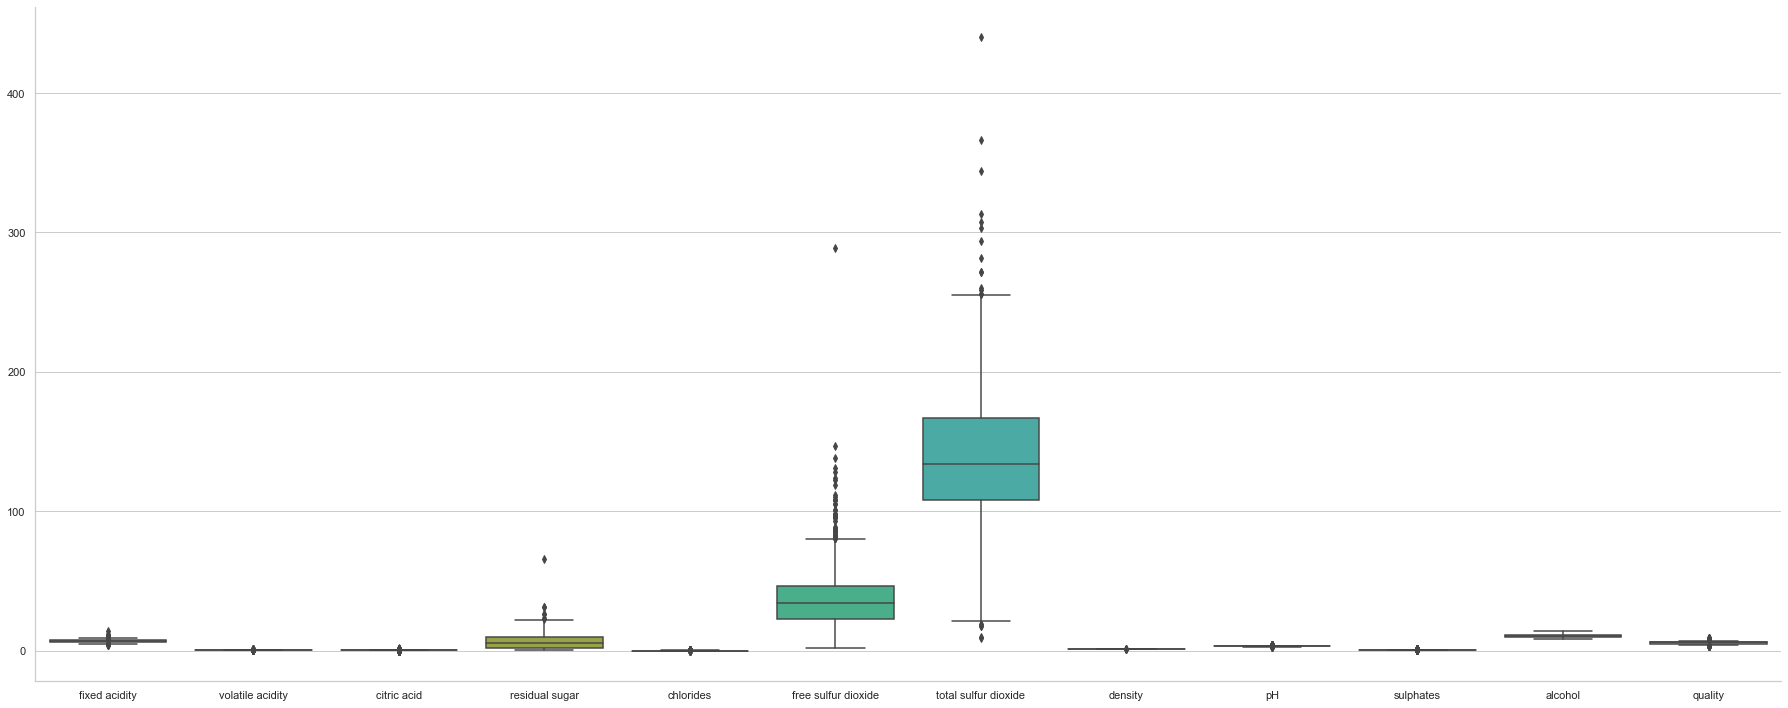

In [9]:
sns.factorplot(data=df,kind='box',size=10,aspect=2.5) # оценим распределение при помощи ящичковых 
#диаграмм, где усы - отклонения, а линия посреди ящичка - медиана, кружочки - выбросы

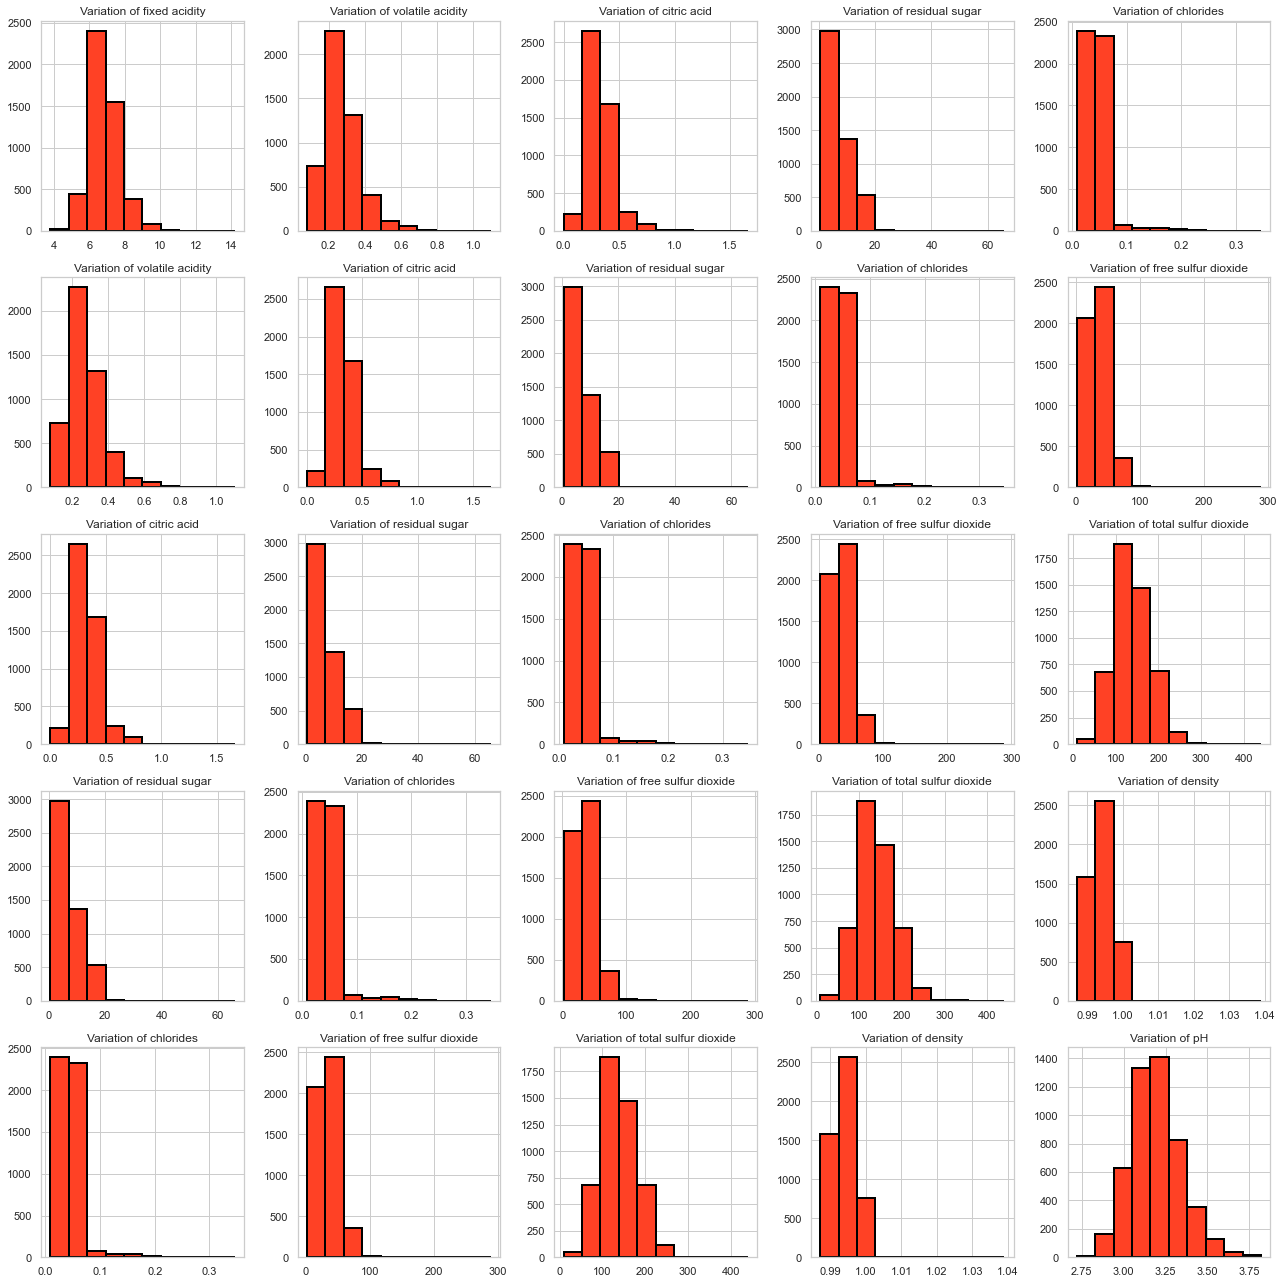

In [10]:
# при помощи гистограмм
fig,axes=plt.subplots(5,5)
columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
for i in range (5):
    for j in range (5):
        axes[i,j].hist(x=columns[i+j],data=df,edgecolor='#000000',linewidth=2,color='#ff4125')
        axes[i,j].set_title('Variation of '+columns[i+j])
fig=plt.gcf()
fig.set_size_inches(18,18)
fig.tight_layout()


Построим корреляционную матрицу

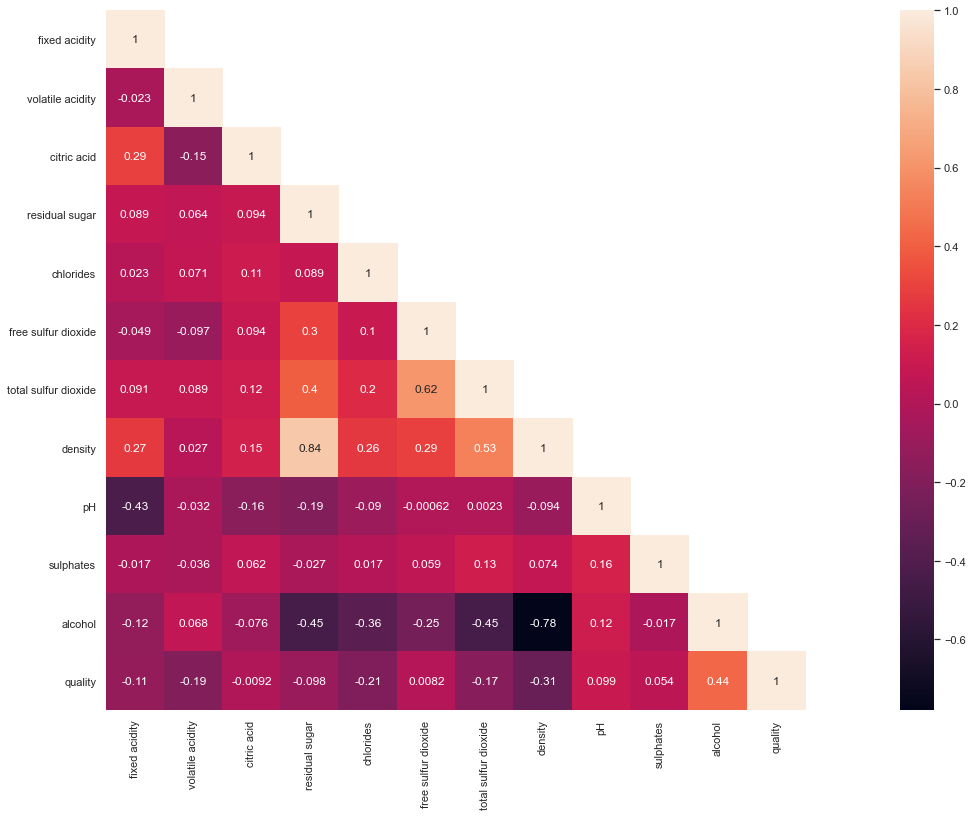

In [11]:
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True);

#  Что можно отметить:

1. Качество вина связано с волатильной кислотностью

2. Также качество связано с алкоголем


# Попробуем визуализировать связть некоторых признаков и таргета

In [13]:
def plot(feature_x,target='quality'):
    sns.factorplot(x=target,y=feature_x,data=df,kind='bar',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='violin',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='swarm',size=5,aspect=1)
    

In [ ]:
# для фиксированной кислотности
plot('fixed acidity','quality')

In [ ]:
# для алкоголя
plot('alcohol','quality')

#  Подготовим датасет к анализу.

In [3]:
# разбиваем на группы, где плохое вино = 0.0, а хорошее = 1.0
# выбрал числа с плавающей точкой, потому что время от времени выбивало ошибку
bins = (2, 6.5, 8)
group_names = [0.0, 1.0]
df['quality'] = df_ = pd.cut(df['quality'], bins = bins, labels = group_names)

In [4]:
label_quality = LabelEncoder()

In [5]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [6]:
# разбиваем на выборку для обучения ( 65%) и для теста (35%)
x_train,x_test,y_train,y_test=train_test_split(df.drop('quality',axis=1),df['quality'],test_size=0.25,random_state=42)

In [25]:
# попробуем сравнить возможные варианты классификации и выберем самую работоспособную
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}
d

{'Modelling Algo': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.7869387755102041,
  0.7942857142857143,
  0.8195918367346938,
  0.8375510204081633,
  0.8857142857142857,
  0.8310204081632653,
  0.8310204081632653,
  0.713469387755102]}

In [8]:
acc_frame=pd.DataFrame(d)
acc_frame
# в итоге получили, что аккуратность случайных лесов самая высокая

,Modelling Algo,Accuracy
0,LogisticRegression,0.786939
1,LinearSVM,0.777959
2,rbfSVM,0.768163
3,KNearestNeighbors,0.777143
4,RandomForestClassifier,0.887347
5,DecisionTree,0.845714
6,GradientBoostingClassifier,0.831020
7,GaussianNB,0.715102


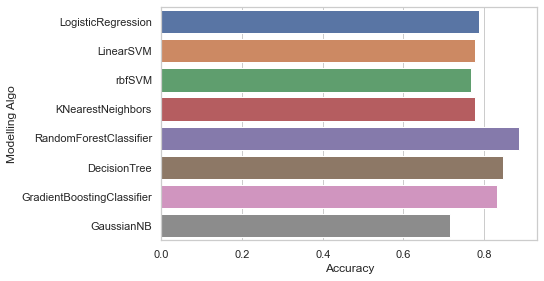

In [9]:
#для пущей уверенности, построим ещё и график
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame);


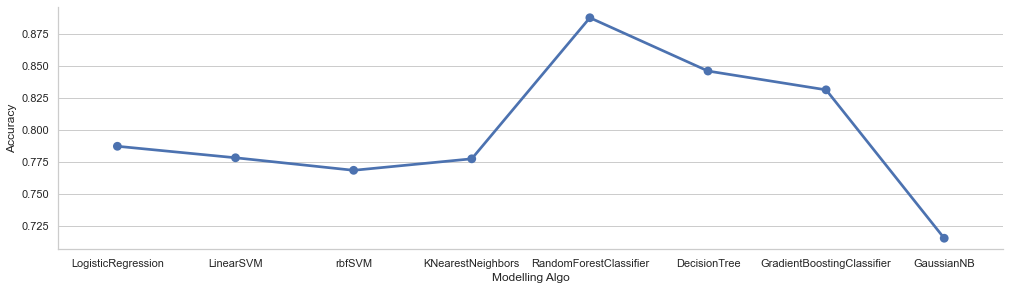

In [10]:
sns.factorplot(x='Modelling Algo',y='Accuracy',data=acc_frame,kind='point',size=4,aspect=3.5);

# Но это мы сделали без скалирование фичей. Попробуем улучшить модель

In [28]:
def func(x_train,x_test,y_train,y_test,name_scaler):
    models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
    acc_sc=[]
    for model in range(len(models)):
        clf=models[model]
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc_sc.append(accuracy_score(pred,y_test))
     
    acc_frame[name_scaler]=np.array(acc_sc)
    

In [29]:

scalers=[MinMaxScaler(),StandardScaler()]
names=['Acc_Min_Max_Scaler','Acc_Standard_Scaler' ]
for scale in range(len(scalers)):
    scaler = scalers[scale]
    scaler.fit(df)
    scaled_df = scaler.transform(df)
    X = scaled_df[:,0:11]
    Y = df['quality'].to_numpy()
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    func(x_train, x_test, y_train, y_test, names[scale])
    
    

In [30]:
# посмотрим как оценивается модель по другим критериям
acc_frame

,Modelling Algo,Accuracy,Acc_Min_Max_Scaler,Acc_Standard_Scaler
0,LogisticRegression,0.786939,0.785306,0.786939
1,LinearSVM,0.777959,0.787755,0.794286
2,rbfSVM,0.768163,0.805714,0.819592
3,KNearestNeighbors,0.777143,0.827755,0.837551
4,RandomForestClassifier,0.887347,0.887347,0.890612
5,DecisionTree,0.845714,0.836735,0.832653
6,GradientBoostingClassifier,0.831020,0.831020,0.831020
7,GaussianNB,0.715102,0.713469,0.713469


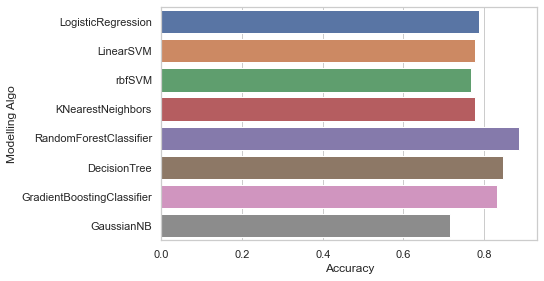

In [31]:
# визуализируем аккуатность ещё разок
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame);

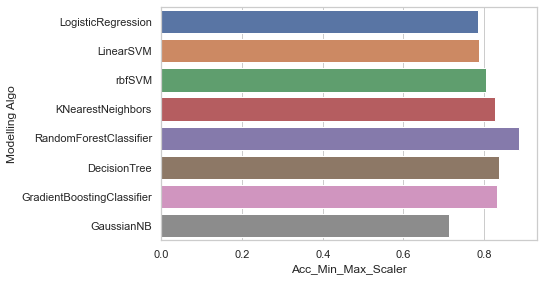

In [32]:
sns.barplot(y='Modelling Algo',x='Acc_Min_Max_Scaler',data=acc_frame);

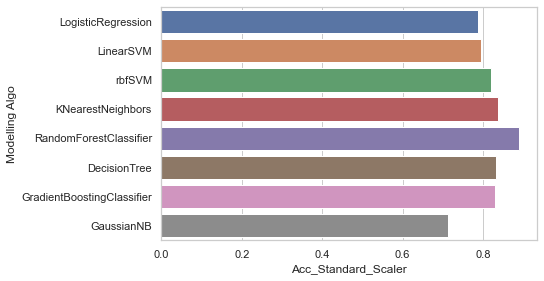

In [33]:
sns.barplot(y='Modelling Algo',x='Acc_Standard_Scaler',data=acc_frame);

In [35]:
# попробуем подготовить фичи получше при помощи класса "СтандартСкалер"
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)
X=scaled_df[:,0:11]
Y=df['quality'].to_numpy()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

###### 1.  Лог. регрессия


In [ ]:
# задаем сетку параметров, будем перебирать 
# разные значения штрафа
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
# проверяем модель со значением параметра, дающим наибольшее
# значение AUC (усредненное по контрольным блокам перекрестной
# проверки), на тестовой выборке
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='roc_auc',cv=10)
clf_lr.fit(x_train,y_train)

In [49]:
clf_lr.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [51]:
# смотрим результаты решетчатого поиска
clf_lr.best_score_

0.8083335801445326

In [52]:
clf_lr.cv_results_

{'mean_fit_time': array([0.00156002, 0.09792233, 0.00155997, 0.08956032, 0.        ,
        0.24180048, 0.        , 0.3395267 , 0.00040002, 0.3704272 ,
        0.        , 0.31668057, 0.        , 0.31980054]),
 'std_fit_time': array([0.00468006, 0.05048973, 0.00467992, 0.00933033, 0.        ,
        0.02539501, 0.        , 0.04617426, 0.00048992, 0.08426466,
        0.        , 0.01852402, 0.        , 0.02003861]),
 'mean_score_time': array([0.        , 0.00166004, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00040004, 0.        , 0.00010002,
        0.        , 0.        , 0.        , 0.        ]),
 'std_score_time': array([0.        , 0.00465628, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00048995, 0.        , 0.00030005,
        0.        , 0.        , 0.        , 0.        ]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
                    100, 1000, 1000],
              mask=[False, Fal

In [53]:
pred=clf_lr.predict(x_test)
accuracy_score(pred,y_test)

0.7877551020408163

######   2. Попробуем использовать метод К-ближайших соседей

In [43]:
l=[i+1 for i in range(50)]
params_dict={'n_neighbors':l,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_knn.fit(x_train,y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [44]:
clf_knn.best_score_

0.838831299609051

In [45]:
clf_knn.best_params_

{'n_jobs': -1, 'n_neighbors': 1}

In [46]:
clf_knn.cv_results_

{'mean_fit_time': array([0.01690006, 0.01814063, 0.01790054, 0.01640091, 0.01724021,
        0.01658032, 0.01569998, 0.01534014, 0.01824024, 0.01716006,
        0.01559997, 0.01716006, 0.01559987, 0.01776004, 0.01725998,
        0.01736002, 0.02122059, 0.01500041, 0.01586037, 0.01484048,
        0.01742046, 0.01624062, 0.01596079, 0.01620049, 0.01616032,
        0.01734021, 0.01608071, 0.0172605 , 0.01820066, 0.01768038,
        0.01620054, 0.01778076, 0.019821  , 0.01600051, 0.01608064,
        0.01608067, 0.01990073, 0.01638069, 0.01896057, 0.01498015,
        0.01582022, 0.01662037, 0.01794066, 0.01440046, 0.01838076,
        0.01660054, 0.01544003, 0.01592023, 0.01702082, 0.01616046]),
 'std_fit_time': array([3.90013059e-03, 4.41076160e-03, 4.26309627e-03, 6.63269708e-04,
        4.65592558e-03, 1.59151653e-03, 3.00049858e-04, 7.79803609e-04,
        5.43313531e-03, 4.68011697e-03, 1.50789149e-07, 4.68003750e-03,
        1.58148994e-07, 4.82393181e-03, 4.65628389e-03, 4.65169196e-0

In [47]:
pred=clf_knn.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

0.8595918367346939

######   Случайный лес

In [55]:
# сразу зададим варианты модификации фичей
params_dict={'n_estimators':[600],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [600]},
             scoring='accuracy')

In [56]:
clf_rf.best_score_

0.8698554673616871

In [57]:
clf_rf.best_params_

{'max_features': 'sqrt', 'n_estimators': 600}

In [58]:
clf_rf.cv_results_

{'mean_fit_time': array([3.71379848, 3.69399004, 3.7042587 ]),
 'std_fit_time': array([0.05439388, 0.03075882, 0.02077463]),
 'mean_score_time': array([0.20800285, 0.20754292, 0.20718207]),
 'std_score_time': array([0.00648563, 0.00765629, 0.00631946]),
 'param_max_features': masked_array(data=['auto', 'sqrt', 'log2'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[600, 600, 600],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 'auto', 'n_estimators': 600},
  {'max_features': 'sqrt', 'n_estimators': 600},
  {'max_features': 'log2', 'n_estimators': 600}],
 'split0_test_score': array([0.85597826, 0.85326087, 0.85326087]),
 'split1_test_score': array([0.88043478, 0.88315217, 0.87771739]),
 'split2_test_score': array([0.89945652, 0.89402174, 0.89402174]),
 'split3_test_score': array([0.86648501, 0.86920981, 0.8746594 ]),
 'split

In [59]:
pred=clf_rf.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

0.8889795918367347

###### 5. Градиентный бустинг

In [60]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[600]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [600]})

In [61]:
clf_gb.best_score_

0.856241114796825

In [62]:
clf_gb.best_params_

{'n_estimators': 600}

In [63]:
pred=clf_gb.predict(x_test)
accuracy_score(pred,y_test)

0.8702040816326531

# # Поработаем с Н2О!

In [5]:
import h2o

In [7]:
from h2o.automl import H2OAutoML

In [13]:
h2o.connect()

Connecting to H2O server at http://localhost:54321 ....... failed.


H2OConnectionError: Could not establish link to the H2O cloud http://localhost:54321 after 5 retries
[23:33.30] H2OConnectionError: Unexpected HTTP error: HTTPConnectionPool(host='localhost', port=54321): Max retries exceeded with url: /3/Cloud (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000000000BAD1EE0>: Failed to establish a new connection: [WinError 10061] Подключение не установлено, т.к. конечный компьютер отверг запрос на подключение'))
[23:35.52] H2OConnectionError: Unexpected HTTP error: HTTPConnectionPool(host='localhost', port=54321): Max retries exceeded with url: /3/Cloud (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000000000BAFE3D0>: Failed to establish a new connection: [WinError 10061] Подключение не установлено, т.к. конечный компьютер отверг запрос на подключение'))
[23:37.73] H2OConnectionError: Unexpected HTTP error: HTTPConnectionPool(host='localhost', port=54321): Max retries exceeded with url: /3/Cloud (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000000000BE5A6A0>: Failed to establish a new connection: [WinError 10061] Подключение не установлено, т.к. конечный компьютер отверг запрос на подключение'))
[23:39.96] H2OConnectionError: Unexpected HTTP error: HTTPConnectionPool(host='localhost', port=54321): Max retries exceeded with url: /3/Cloud (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000000000BE5AE50>: Failed to establish a new connection: [WinError 10061] Подключение не установлено, т.к. конечный компьютер отверг запрос на подключение'))
[23:42.19] H2OConnectionError: Unexpected HTTP error: HTTPConnectionPool(host='localhost', port=54321): Max retries exceeded with url: /3/Cloud (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000000052050A0>: Failed to establish a new connection: [WinError 10061] Подключение не установлено, т.к. конечный компьютер отверг запрос на подключение'))

In [11]:
wine = h2o.import_file("winequality-white.csv")
head(wine, 5)

H2OConnectionError: Not connected to a cluster. Did you run `h2o.connect()`?

In [15]:
h2o.init(ip="127.0.0.1",max_mem_size_GB = 2)

Checking whether there is an H2O instance running at http://127.0.0.1:54321 ..... not found.
Attempting to start a local H2O server...


H2OStartupError: Cannot find Java. Please install the latest JRE from
http://www.oracle.com/technetwork/java/javase/downloads/index.html